In [1]:
### Multilateral Development Institution Data
foo <- read.csv("https://tinyurl.com/yb4phxx8") # read in the data

# column names
names(foo)

# dimensions of the data set
dim(foo)

# quick look at the data structure
head(foo)

# one thing to be very careful with (in this data set) is the use of dates. 8 columns involve dates.

# take note of the columns representing calendar dates
date.columns <- c(11, 12, 14, 15, 16, 17, 18, 25)

[1] "Number"                  "Status"                 
 [3] "Cluster"                 "Prefix"                 
 [5] "Type"                    "Country"                
 [7] "Dept"                    "Division"               
 [9] "LTAA"                    "Loan"                   
[11] "ApprovalDate"            "AgreementDate"          
[13] "Agreement"               "EffectivityDate"        
[15] "CancellationDate"        "FinancialCompletionDate"
[17] "OriginalCompletionDate"  "RevisedCompletionDate"  
[19] "JSF"                     "Fund"                   
[21] "RevisedAmount"           "Rating"                 
[23] "No"                      "PCR"                    
[25] "CirculationDate"

[1] 9016   25

Number,Status,Cluster,Prefix,Type,Country,Dept,Division,LTAA,Loan,...,FinancialCompletionDate,OriginalCompletionDate,RevisedCompletionDate,JSF,Fund,RevisedAmount,Rating,No,PCR,CirculationDate
5001,Financially Completed,,R,RETA,REG,,,"Agriculture, natural resources and rural development",0,...,1987-12-31,,1987-12-31,NA,2,0.155,NA,,,
1,Financially Completed,,,ADTA,INO,,,"Agriculture, natural resources and rural development",0,...,1968-07-31,,1968-07-31,NA,2,0.080,NA,,,
2,Financially Completed,,,ADTA,KOR,,,"Agriculture, natural resources and rural development",0,...,1969-10-31,,1969-10-31,NA,2,0.067,NA,,,
3,Financially Completed,,,ADTA,PHI,,,"Agriculture, natural resources and rural development",0,...,1970-01-31,,1970-01-31,NA,2,0.105,NA,,,
4,Financially Completed,,,ADTA,VIE,,,Finance,0,...,1972-08-31,,1972-08-31,NA,2,0.115,NA,,,
5,Financially Completed,,,PPTA,PHI,,,Transport,0,...,1970-03-31,,1970-03-31,NA,2,0.325,NA,,,


In [89]:
for(i in date.columns)  
  
{
  
  
  which_values_are_missing <- which(as.character(foo[, i]) == "")
  
 
  foo[which_values_are_missing, i] <- NA
  
 
  foo[, i] <- as.Date(as.character(foo[, i]))
  
}


# foo[3,12]
# [1] "1968-03-13"

# foo[4,12]
# [1] "1968-07-03"

# foo[3,12] - foo[4,12]
# Time difference of -112 days


which.have.NAs <- which(is.na(foo$Rating == TRUE)) 
revised_foo <- foo[-which.have.NAs, ]


Read all the questions before you begin.
IMPORTANT: For all questions below, only consider projects with non-missing “Circulation.Date” >= 2009-01-01. Exclude all other projects from your analysis. Failing to do so will
severely impact your scores, even if your analysis is otherwise correct.
Also, note that you must provide a link to your R code. You should create a gist with all
of your code and include the link at the start of your assignment (see how to create gists here).
Copying and pasting large excerpts of code in the body of your assignment will entail a 1 in
#professionalism and may impact other scores as well. If an excerpt of code is necessary to
demonstrate a point you’re making, limit yourself to a few lines which should nevertheless be
included in your gist.
Finally, note that the column called “Rating” is the success rating of the project at completion.
0 = lowest, 3 = highest.

In [90]:
#Considering only non-missing Circulation dates after 01-01-2009
circ.date.values <- which(as.character(revised_foo$CirculationDate) >= "2009-01-01" &
                            as.character(revised_foo$CirculationDate) != "NA")
revised_foo <- revised_foo[circ.date.values, ]

foo$CirculationDate
foo

[1] "2010-01-15" "2009-12-29" "2009-10-30" "2009-11-11" "2009-08-31"
   [6] "2009-12-29" "2009-05-13" "2010-02-16" "2009-11-27" "2011-12-08"
  [11] "2010-03-24" "2011-07-19" "2009-11-27" "2009-04-15" "2009-12-08"
  [16] "2009-01-15" "2011-08-17" "2009-11-20" "2009-12-18" "2009-12-16"
  [21] "2009-11-27" "2009-04-07" "2010-12-28" "2014-07-08" "2011-03-08"
  [26] "2009-04-17" "2009-12-03" "2009-03-17" "2009-11-27" "2009-05-29"
  [31] "2010-12-29" "2009-11-12" "2009-01-14" "2009-05-26" "2009-02-11"
  [36] "2009-12-08" "2009-08-31" "2009-12-09" "2009-11-11" "2010-07-29"
  [41] "2009-11-27" "2010-01-13" "2009-06-04" "2010-12-15" "2010-01-21"
  [46] "2010-03-18" "2009-12-29" "2009-07-15" "2009-10-02" "2009-11-18"
  [51] "2009-06-30" "2009-05-26" "2009-12-29" "2009-07-03" "2009-08-31"
  [56] "2011-05-24" "2009-09-16" "2009-07-31" "2009-08-03" "2009-04-17"
  [61] "2009-08-03" "2009-01-21" "2009-10-13" "2009-04-02" "2009-10-07"
  [66] "2009-12-17" "2011-09-19" "2011-04-01" "2011-01-20" "2009-12-16"
  [71] "2009-06-08" "2009-08-26" "2012-08-17" "2015-06-30" "2010-07-23"
  [76] "2009-12-15" "2011-07-26" "2010-08-23" "2010-05-24" "2009-02-03"
  [81] "2010-02-11" "2009-01-30" "2014-09-25" "2010-07-30" "2009-12-11"
  [86] "2009-07-31" "2009-06-08" "2009-05-21" "2012-02-08" "2011-09-09"
  [91] "2009-03-31" "2011-01-14" "2009-12-29" "2010-12-20" "2010-10-27"
  [96] "2012-03-20" "2009-12-28" "2010-09-07" "2009-10-30" "2009-12-10"
 [101] "2010-06-25" "2012-01-26" "2009-12-24" "2009-11-20" "2009-11-05"
 [106] "2011-07-21" "2009-06-30" "2011-12-22" "2011-12-28" "2012-08-17"
 [111] "2015-03-25" "2009-04-08" "2009-03-31" "2009-04-21" "2011-08-19"
 [116] "2011-12-20" "2009-01-23" "2013-08-02" "2012-01-06" "2010-11-12"
 [121] "2010-05-20" "2010-03-22" "2009-12-22" "2009-08-31" "2011-05-11"
 [126] "2009-11-05" "2009-07-14" "2009-04-15" "2009-04-07" "2009-03-23"
 [131] "2009-01-20" "2012-05-18" "2010-12-15" "2009-12-08" "2009-07-08"
 [136] "2011-06-08" "2014-05-12" "2009-12-11" "2009-08-06" "2010-07-19"
 [141] "2010-12-29" "2010-07-23" "2009-12-28" "2009-12-18" "2009-06-25"
 [146] "2010-07-13" "2013-10-14" "2009-02-25" "2010-12-03" "2011-10-25"
 [151] "2009-08-12" "2013-10-14" "2009-05-13" "2009-12-24" "2009-08-31"
 [156] "2011-06-01" "2009-02-17" "2009-03-17" "2010-04-27" "2010-02-22"
 [161] "2009-10-30" "2009-07-29" "2009-06-02" "2009-12-28" "2010-12-20"
 [166] "2010-07-05" "2010-05-24" "2010-08-31" "2010-06-30" "2010-08-09"
 [171] "2009-10-30" "2009-10-07" "2009-05-28" "2010-05-20" "2015-09-14"
 [176] "2012-11-05" "2009-12-28" "2009-11-20" "2009-08-12" "2009-04-20"
 [181] "2010-12-22" "2009-11-19" "2011-12-20" "2010-06-17" "2010-02-15"
 [186] "2009-12-22" "2009-07-22" "2011-11-23" "2009-09-24" "2011-09-15"
 [191] "2010-09-20" "2009-11-18" "2009-07-28" "2009-07-10" "2009-08-18"
 [196] "2012-05-18" "2012-07-10" "2011-05-26" "2010-08-23" "2010-08-19"
 [201] "2010-06-07" "2010-05-14" "2009-12-08" "2009-10-14" "2009-08-19"
 [206] "2009-05-28" "2009-03-06" "2009-06-15" "2009-05-08" "2009-06-30"
 [211] "2013-10-18" "2009-05-21" "2013-09-12" "2011-02-21" "2009-09-16"
 [216] "2009-05-21" "2018-05-08" "2012-01-26" "2010-05-31" "2010-12-28"
 [221] "2009-07-14" "2011-11-24" "2009-07-30" "2009-12-10" "2010-01-28"
 [226] "2009-09-07" "2011-12-27" "2010-07-22" "2010-06-17" "2009-08-26"
 [231] "2011-10-14" "2010-07-02" "2009-07-30" "2009-03-11" "2011-12-13"
 [236] "2011-07-28" "2010-12-27" "2009-01-26" "2009-07-17" "2010-01-28"
 [241] "2010-03-17" "2011-10-27" "2010-07-01" "2010-09-30" "2009-03-31"
 [246] "2009-08-26" "2009-03-31" "2017-08-15" "2009-12-22" "2016-09-19"
 [251] "2012-08-17" "2010-06-01" "2012-11-14" "2011-06-29" "2010-05-20"
 [256] "2010-01-28" "2009-07-29" "2009-06-10" "2009-11-27" "2013-08-05"
 [261] "2009-10-30" "2009-05-08" "2010-12-20" "2009-08-12" "2009-05-27"
 [266] "2010-07-02" "2009-10-13" "2010-06-07" "2010-08-11" "2013-10-03"
 [271] "2010-12-28" "2010-12-21" "2010-03-17" "2009-12-21" "2009-11-19"
 [276] "2009-09-07" "2009-08-26" "2009-07-3

,Number,Status,Cluster,Prefix,Type,Country,Dept,Division,LTAA,Loan,...,FinancialCompletionDate,OriginalCompletionDate,RevisedCompletionDate,JSF,Fund,RevisedAmount,Rating,No,PCR,CirculationDate
2754,5600,Financially Completed,,R,RETA,REG,PPFD,COCS,Public sector management,0,...,2004-10-29,2003-12-31,2003-12-31,NA,2,0.120,2,20-10,,2010-01-15
2904,5624,Financially Completed,,R,RETA,REG,PPFD,COPP,Public sector management,0,...,2002-04-30,NA,1997-12-31,NA,2,0.600,3,471-09,,2009-12-29
3059,2440,Financially Completed,,,ADTA,MLD,SFSP-AUS,SAOC**,Public sector management,0,...,2003-04-30,NA,1998-06-30,NA,2,0.400,2,309-09,,2009-10-30
3440,5720,Financially Completed,,R,RETA,REG,PPFD,COCS,Public sector management,0,...,2002-05-31,NA,2001-11-30,NA,2,0.480,2,320-09,,2009-11-11
3441,2748,Financially Completed,,,ADTA,PRC,OGC,OGC,Public sector management,0,...,2001-03-31,NA,2000-06-30,NA,2,0.600,2,240-09,,2009-08-31
3500,2794,Financially Completed,,,PPTA,PHI,SERD**,SESS**,Education,0,...,2004-01-31,NA,2002-12-31,1,"04,37",0.670,1,464-09,,2009-12-29
3660,2928,Financially Completed,,,PPTA,PAK,AWD,AWWU,Water and other urban infrastructure and services,0,...,2001-03-31,NA,2000-04-30,1,4,0.900,1,98-09,,2009-05-13
3662,2930,Financially Completed,,,PPTA,INO,SERD**,SESS**,Health,0,...,2004-01-31,1999-10-31,2002-06-30,1,4,0.900,0,45-10,,2010-02-16
3722,5773,Financially Completed,,R,RETA,REG,OGC,OGC,Finance,0,...,2005-08-23,1998-11-30,2003-01-30,NA,2,0.380,2,351-09,,2009-11-27
3766,5788,Financially Completed,,R,RETA,REG,ECRD**,ECOD,Public sector management,0,...,2005-05-17,2000-08-31,2004-12-31,1,4,0.450,2,319-11,,2011-12-08


1.When projects are approved, they are approved for a certain period (until the time of “original completion date”). While projects are active, this “original” completion date is often
extended, and then there is a “revised” completion date. You have been told that project
duration at approval is generally about two years (24 months). In other words, (purportedly)
when projects are approved, the difference between the original project completion date and
the approval date is (supposedly) approximately 24 months. 
(a) Is this claim true? Explain. 

In [91]:
#First, we have to find which approval dates are missing, given that it has a non-NA circulation date. 
missing_app_dates <- which(is.na(revised_foo$ApprovalDate) |
                                  is.na(revised_foo$OriginalCompletionDate))
if (length(missing_app_dates) > 0) {
  project.duration <- revised_foo[-missing_app_dates, c(11, 17, 25)] # 11, 17, and 25 represent the columns as named above
} else {
  project.duration <- revised_foo[, c(11, 17, 25)]
}
project.duration 

proj_duration <- as.Date(as.character(project.duration[, 2])) -
                        as.Date(as.character(project.duration[, 1]))
proj_duration # A vector has been created with the differences between approval dates and completion dates

,ApprovalDate,OriginalCompletionDate,CirculationDate
2754,1994-10-10,2003-12-31,2010-01-15
3662,1997-12-09,1999-10-31,2010-02-16
3722,1998-01-06,1998-11-30,2009-11-27
3766,1998-04-16,2000-08-31,2011-12-08
3865,1998-10-06,2000-06-30,2009-11-27
3919,1998-12-16,2001-04-30,2009-04-15
3936,1998-12-23,2000-02-29,2009-01-15
4017,1999-06-02,2001-06-30,2011-08-17
4043,1999-07-14,2000-06-30,2009-12-18
4053,1999-07-30,2000-02-29,2009-12-16


Time differences in days
   [1] 3369  691  328  868  633  866  433  759  352  214  657  570  429  381
  [15]  310 1189 1219 2895  656  892  187  187  380  653 1221 1866  399  657
  [29]  229 1112  378 1654 1107  363 1062  366  359  607  504  262  338  269
  [43]  256  378  285 1107  414  902  744  236 1172  919  767  574  635  478
  [57]   81  966 1494 1129  938 2213  383  565  439  803  376  802  408  954
  [71] 1108  743 1107  425  231  222  353  532  275 1278  218  502  652  640
  [85]  352  186  947  883 1177  748  565  589 1100 1477   68  519  301 1395
  [99]  751  232  750  171  746  746 1567  654  562  592 1109  287  744  713
 [113]  956  469 1168  194 1839 1259  409  406  405  436  626  759 1128 1835
 [127]  739  209  622  449  221 1108 1193  491  822  719  811  809  350  521
 [141]  789  422  511  418  752  386  687 1139  315 1562  734 1124 1184  727
 [155]  923  377  758  755 1202  155 1116  198  897  381 1110  776  744  834
 [169]  834  591  591  347  802 1562  892  496  557

Time difference of 650.9313 days

Time difference of 599.5 days

Time differences in days
     0%     25%     50%     75%    100% 
  18.00  406.25  599.50  792.00 3369.00 

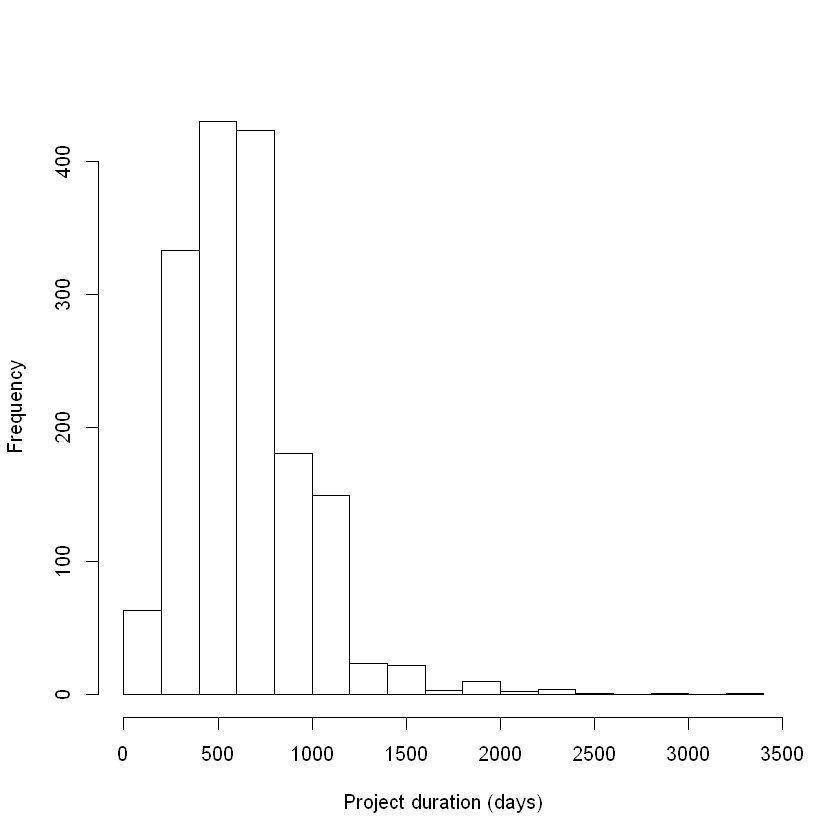

In [92]:
#Calculating mean, median, quantile and histogram of the created vector proj_duration
mean(proj_duration)
median(proj_duration)
quantile(proj_duration)
hist(as.numeric(proj_duration), main = "", xlab = "Project duration (days)")

Answer: The claim is not true. The mean number of days for duration time of project is about 651 days, which in year units is 1.78 years, less than the 2 year claim given in the question. You can also see by the median (600 days is about 1.64 years), interquartile range and histogram created above that most of the project durations are less than 730 days (2 years). The true value is likely to be closer to 600 days (median). Hence, this claim is false. 

(b) Has the length of project delay, measured as the difference between “OriginalCompletionDate” and “RevisedCompletionDate”, changed over time (consider projects circulated earlier and circulated later)? You will need to make a choice of how to deal
with missing information, which you should explicitly discuss. Be sure to also discuss
mean delays, median delays, and the interquartile range of delays (using the “quantile”
function). Approximate suggested length: 3-5 sentences.


,OriginalCompletionDate,RevisedCompletionDate,CirculationDate
2754,2003-12-31,2003-12-31,2010-01-15
3662,1999-10-31,2002-06-30,2010-02-16
3722,1998-11-30,2003-01-30,2009-11-27
3766,2000-08-31,2004-12-31,2011-12-08
3865,2000-06-30,2004-02-29,2009-11-27
3919,2001-04-30,2008-10-31,2009-04-15
3936,2000-02-29,2007-09-30,2009-01-15
4017,2001-06-30,2007-06-30,2011-08-17
4043,2000-06-30,2003-09-30,2009-12-18
4053,2000-02-29,2000-12-31,2009-12-16


Time differences in days
   [1]    0  973 1522 1583 1339 2741 2770 2191 1187  306 1795  518 2922 2769
  [15] 1887    0  366  731 1826 1764 2617 1461  638 1280  348   59 2282  182
  [29] 1035 1827 2496    0  670 1004 1704  609 1371  974 2161 2587  273 1096
  [43]  487 1886  548 1095  945  821 1522 1157 1673 1706  486 1309 1614 1676
  [57]  731    0  821 1216  549  365  366 1095  884 1371    0 1675  759 1158
  [71] 1186 1430 1826 1701  821 1643  579 1126  244  365  915 1430  243  914
  [85] 1308 1887  761 1006  486  243  304 1096  943  213  365 1310 1278  152
  [99]  912 1003  730  914  730 1461  275 1308 1096 1095 1323  335  730 1005
 [113]  731 1157  306  730    0  214 1064 1430  365 1096  821  915 1188   92
 [127] 1187  594  579 1096  242  266  731 1065  456  273  547  396  457 1371
 [141]  456  730  502  304  852  761  609  182  335  365  487  547  588  913
 [155]  366 1112  243 1186    0  549    0 1249  335  761  700  790  365  761
 [169]  366  518  654 1127  731  563  945  731  974

Time difference of 569.0881 days

Time difference of 457 days

Time differences in days
  0%  25%  50%  75% 100% 
   0  245  457  761 3837 

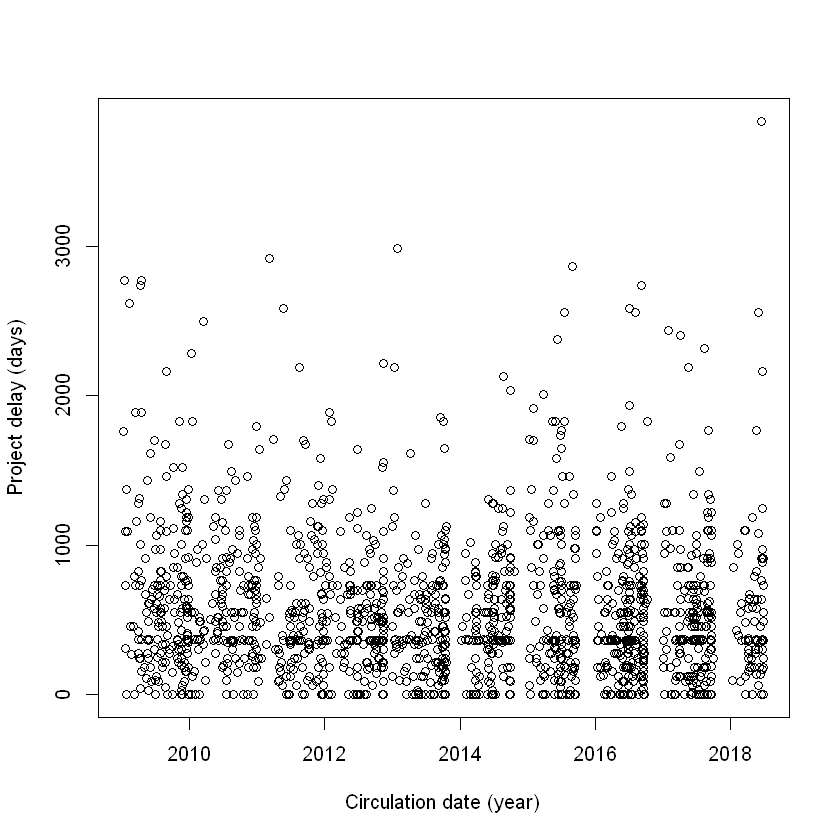

In [108]:
dates_missing <- which(is.na(revised_foo$OriginalCompletionDate) |
                                  is.na(revised_foo$RevisedCompletionDate))
if (length(dates_missing) > 0) {
  proj_dur <- revised_foo[-dates_missing, c(17, 18, 25)]
} else {
  proj_dur <- revised_foo[, c(17, 18, 25)]
}
proj_dur
proj_durv <- as.Date(as.character(proj_dur[, 2])) -
                        as.Date(as.character(proj_dur[, 1]))

proj_durv
mean(proj_durv)
median(proj_durv)
quantile(proj_durv)
plot(proj_dur[3], proj_durv, xlab = "Circulation date (year)", ylab = "Project delay (days)")


Answer: When project durations are compared from 2009 to 2018, we see that there are not really any trends or changes seen. Most projects have a original project duration between 250 and 100 days.

(c) How does the original planned project duration differ from actual duration (if the actual
duration is measured as the duration between “ApprovalDate” and “RevisedCompletionDate”)? Once again, use means, medians, and interquartile ranges to explain your results. Approximate suggested length: 3-5 sentences

,ApprovalDate,RevisedCompletionDate,CirculationDate
2754,1994-10-10,2003-12-31,2010-01-15
2904,1995-03-07,1997-12-31,2009-12-29
3059,1995-11-09,1998-06-30,2009-10-30
3440,1997-01-14,2001-11-30,2009-11-11
3441,1997-01-15,2000-06-30,2009-08-31
3500,1997-05-19,2002-12-31,2009-12-29
3660,1997-12-05,2000-04-30,2009-05-13
3662,1997-12-09,2002-06-30,2010-02-16
3722,1998-01-06,2003-01-30,2009-11-27
3766,1998-04-16,2004-12-31,2011-12-08


Time differences in days
   [1] 3369 1030  964 1781 1262 2052  877 1664 1850 2451 1021  887 1972 3607
  [15] 1225 3203 2950 1141 1539  520 1049 1006 2452 1088 3351 3150  739 2197
  [29] 1189 1585 3626 2482 2656 2804  381 1648 1018 1933 1569 1925 2681  839
  [43] 1264 2939 2874 1654 1777  984 1367 2766  975 1730 1581 2665 2849  611
  [57] 1365  743 2264  833 2202 1359 1723 2266 1393 2845 2625 1253 1883 2249
  [71] 2154  812  966 2315 2345 1487 2578  749 1660 1323 2174  376 2477 1167
  [85] 2112 2294 2173 2933 2126 1052 1865  932 1658  519 1643 1133 1932  895
  [99] 1554 1660 2073 1708 1889 1663  991  869 1685 2043 1690  433 1829 1579
 [113] 1547 1663 1235 1480 1085 1476 2207 1842 1962 1658 1687 2432  622 1474
 [127] 1718 1687 1626 1474  924 1839 1473 1473 1836  770 1532 1447 1674 2316
 [141] 1927 1926  803 1201 1545  463 1374 1924 1556 1278  992 1358 1205  807
 [155] 1892 1245 1152 1013  722 1604 1147 1296 1321  650 1927 1221 1671 1772
 [169] 1640 1289 1489 1001 1941 1202  704 1116 1447

Time difference of 1218.875 days

Time difference of 1120 days

Time differences in days
  0%  25%  50%  75% 100% 
  56  839 1120 1482 4395 

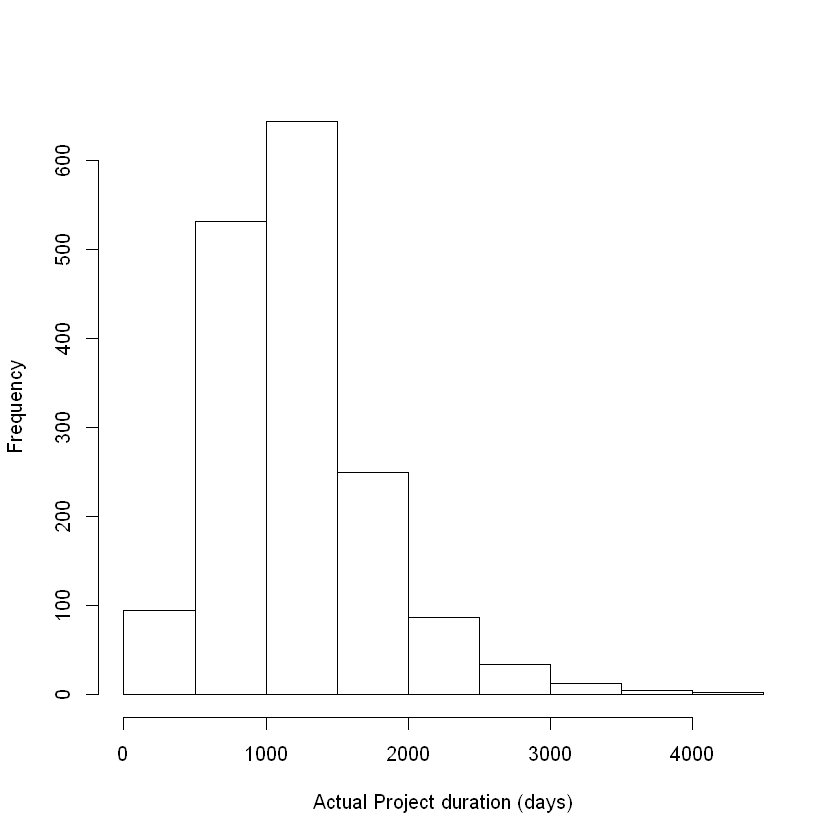

In [117]:
#Creating a vector for Actual duration, vector for predicted duration was calculated earlier
missing <- which(is.na(revised_foo$ApprovalDate) |
                                  is.na(revised_foo$RevisedCompletionDate))
if (length(missing) > 0) {
  act_dur <- revised_foo[-missing, c(11, 18, 25)]
} else {
  act_dur <- revised_foo[, c(11, 18, 25)]
}
act_dur
act_durv <- as.Date(as.character(act_dur[, 2])) -
                        as.Date(as.character(act_dur[, 1]))

act_durv
mean(act_durv)
median(act_durv)
quantile(act_durv)
hist(as.numeric(act_durv), main = "", xlab = "Actual Project duration (days)")









Answer: To find out the change seen in project duration over time, the difference between original completion date and revised completion date was calculated (revised dates - org dates). The mean was calculated to be 569 days and the median was 457 days, it is also 50 percent quantile range. This shows us that projects are usually on average put off by 457 days, however there are some exceptions in the 4th quantile which make the mean increase. The data above suggests that according to the mean, project are usually postponed by 569 days, but if a project were arbitrarily chosen, it is likely to be postponed by 457 days. 

2.What % of projects completed between 2010 and now were rated 0? What % over the same
time period were rated 1? What % were rated 2? What % were rated 3? Answer these
questions using a table or a figure. Provide a title and an explanatory sentence or two that
provides the numerical % results rounded to the nearest percentage point.

In [95]:
#Considering only non-missing Ratings after 01-01-2010
rating.values <- which(as.character(revised_foo$CirculationDate) >= "2010-01-01" &
                            as.character(revised_foo$CirculationDate) != "NA"   &
                            as.character(revised_foo$Rating) != "NA")
revised1_foo <- revised_foo[rating.values, ]

revised1_foo$CirculationDate
revised1_foo

[1] "2010-01-15" "2010-02-16" "2011-12-08" "2010-03-24" "2011-07-19"
   [6] "2011-08-17" "2010-12-28" "2014-07-08" "2011-03-08" "2010-12-29"
  [11] "2010-07-29" "2010-01-13" "2010-12-15" "2010-01-21" "2010-03-18"
  [16] "2011-05-24" "2011-09-19" "2011-04-01" "2011-01-20" "2012-08-17"
  [21] "2015-06-30" "2010-07-23" "2011-07-26" "2010-08-23" "2010-05-24"
  [26] "2010-02-11" "2014-09-25" "2010-07-30" "2012-02-08" "2011-09-09"
  [31] "2011-01-14" "2010-12-20" "2010-10-27" "2012-03-20" "2010-09-07"
  [36] "2010-06-25" "2012-01-26" "2011-07-21" "2011-12-22" "2011-12-28"
  [41] "2012-08-17" "2015-03-25" "2011-08-19" "2011-12-20" "2013-08-02"
  [46] "2012-01-06" "2010-11-12" "2010-05-20" "2010-03-22" "2011-05-11"
  [51] "2012-05-18" "2010-12-15" "2011-06-08" "2014-05-12" "2010-07-19"
  [56] "2010-12-29" "2010-07-23" "2010-07-13" "2013-10-14" "2010-12-03"
  [61] "2011-10-25" "2013-10-14" "2011-06-01" "2010-04-27" "2010-02-22"
  [66] "2010-12-20" "2010-07-05" "2010-05-24" "2010-08-31" "2010-06-30"
  [71] "2010-08-09" "2010-05-20" "2015-09-14" "2012-11-05" "2010-12-22"
  [76] "2011-12-20" "2010-06-17" "2010-02-15" "2011-11-23" "2011-09-15"
  [81] "2010-09-20" "2012-05-18" "2012-07-10" "2011-05-26" "2010-08-23"
  [86] "2010-08-19" "2010-06-07" "2010-05-14" "2013-10-18" "2013-09-12"
  [91] "2011-02-21" "2018-05-08" "2012-01-26" "2010-05-31" "2010-12-28"
  [96] "2011-11-24" "2010-01-28" "2011-12-27" "2010-07-22" "2010-06-17"
 [101] "2011-10-14" "2010-07-02" "2011-12-13" "2011-07-28" "2010-12-27"
 [106] "2010-01-28" "2011-10-27" "2010-07-01" "2010-09-30" "2017-08-15"
 [111] "2016-09-19" "2012-08-17" "2010-06-01" "2012-11-14" "2011-06-29"
 [116] "2010-05-20" "2010-01-28" "2013-08-05" "2010-12-20" "2010-07-02"
 [121] "2010-06-07" "2010-08-11" "2013-10-03" "2010-12-28" "2010-12-21"
 [126] "2010-03-17" "2010-11-11" "2010-08-06" "2010-02-26" "2010-05-28"
 [131] "2013-08-28" "2010-12-27" "2010-06-30" "2012-02-15" "2010-02-26"
 [136] "2011-11-29" "2011-09-09" "2016-07-22" "2017-09-21" "2012-10-10"
 [141] "2010-11-15" "2018-06-14" "2012-10-23" "2011-12-01" "2010-10-15"
 [146] "2010-10-01" "2010-04-05" "2013-10-03" "2010-09-30" "2011-10-17"
 [151] "2010-06-30" "2012-04-16" "2011-07-01" "2010-03-19" "2010-12-29"
 [156] "2011-11-03" "2010-12-10" "2011-07-11" "2010-03-16" "2012-11-07"
 [161] "2017-06-30" "2013-01-09" "2014-06-05" "2010-12-13" "2013-07-01"
 [166] "2011-07-07" "2010-12-07" "2010-09-03" "2010-01-12" "2010-11-19"
 [171] "2011-07-20" "2011-04-26" "2010-06-28" "2014-10-01" "2014-10-01"
 [176] "2014-02-24" "2014-03-25" "2010-12-29" "2012-06-29" "2010-12-27"
 [181] "2010-10-04" "2010-12-07" "2012-11-12" "2012-02-15" "2011-09-14"
 [186] "2010-03-26" "2012-03-09" "2010-11-12" "2013-06-07" "2010-11-25"
 [191] "2013-05-06" "2016-08-03" "2012-01-20" "2011-02-24" "2012-05-18"
 [196] "2012-01-26" "2015-07-21" "2010-09-28" "2012-08-28" "2011-04-26"
 [201] "2015-01-14" "2012-11-05" "2010-12-09" "2017-03-31" "2013-08-15"
 [206] "2010-03-02" "2010-07-21" "2015-02-04" "2010-09-30" "2014-08-06"
 [211] "2011-10-07" "2010-12-07" "2010-05-20" "2010-05-20" "2011-06-30"
 [216] "2010-09-10" "2011-06-30" "2012-09-12" "2013-09-11" "2010-12-28"
 [221] "2010-07-22" "2011-12-08" "2011-06-27" "2015-09-03" "2010-10-22"
 [226] "2012-06-26" "2010-12-16" "2010-10-01" "2018-06-29" "2015-05-08"
 [231] "2016-01-19" "2010-07-05" "2010-03-02" "2010-02-05" "2013-05-23"
 [236] "2010-11-19" "2013-05-31" "2011-11-29" "2011-04-25" "2010-12-29"
 [241] "2010-05-14" "2012-08-17" "2011-10-03" "2010-12-10" "2012-10-10"
 [246] "2013-01-03" "2011-08-05" "2011-01-18" "2010-12-28" "2010-08-26"
 [251] "2013-10-11" "2013-03-21" "2012-11-15" "2011-12-13" "2011-08-26"
 [256] "2011-08-16" "2011-01-12" "2010-10-22" "2010-06-24" "2010-08-27"
 [261] "2010-07-26" "2015-02-03" "2012-11-15" "2011-12-06" "2010-06-24"
 [266] "2010-05-07" "2010-11-15" "2011-10-12" "2012-11-15" "2010-01-19"
 [271] "2012-11-09" "2011-03-10" "2011-06-22" "2014-08-19" "2010-12-10"
 [276] "2012-06-25" "2010-02-26" "2015-03-2

,Number,Status,Cluster,Prefix,Type,Country,Dept,Division,LTAA,Loan,...,FinancialCompletionDate,OriginalCompletionDate,RevisedCompletionDate,JSF,Fund,RevisedAmount,Rating,No,PCR,CirculationDate
2754,5600,Financially Completed,,R,RETA,REG,PPFD,COCS,Public sector management,0,...,2004-10-29,2003-12-31,2003-12-31,NA,2,0.120,2,20-10,,2010-01-15
3662,2930,Financially Completed,,,PPTA,INO,SERD**,SESS**,Health,0,...,2004-01-31,1999-10-31,2002-06-30,1,4,0.900,0,45-10,,2010-02-16
3766,5788,Financially Completed,,R,RETA,REG,ECRD**,ECOD,Public sector management,0,...,2005-05-17,2000-08-31,2004-12-31,1,4,0.450,2,319-11,,2011-12-08
3812,5795,Financially Completed,,R,RETA,REG,OGC,OGC,Finance,0,...,2002-07-31,NA,2001-04-30,1,"02,04",0.610,2,73-10,,2010-03-24
3843,3067,Financially Completed,,,ADTA,IND,AWD,AWWU,Finance,0,...,2001-12-31,NA,2001-02-14,NA,2,0.500,2,136-11,,2011-07-19
4017,5847,Financially Completed,,R,RETA,REG,OREI,OREI,Finance,0,...,2011-05-31,2001-06-30,2007-06-30,NA,2,2.150,1,163-11,,2011-08-17
4110,3274,Financially Completed,,S,ADTA,SRI,SARD,SLRM,"Agriculture, natural resources and rural development",0,...,2007-10-22,2001-07-31,2006-06-30,NA,2,0.150,1,,407-10,2010-12-28
4116,4467,Financially Completed,,S,ADTA,VIE,SERD,VRM,Public sector management,0,...,2011-07-28,2006-06-30,2007-11-30,NA,66,0.150,2,203-14,,2014-07-08
4153,5870,Financially Completed,,R,RETA,REG,OREI,OREI,Public sector management,0,...,2011-01-31,2001-01-31,2009-01-31,NA,"02,35",0.980,1,34-11,,2011-03-08
4269,3395,Financially Completed,,,ADTA,MON,EARD,MNRM,"Agriculture, natural resources and rural development",1736,...,2010-03-31,2007-12-31,2009-12-31,1,4,0.990,2,425-10,,2010-12-29


In [96]:
colnames(revised1_foo)
rating <- revised1_foo[, c(22, 5)]
totalproj <- nrow(rating)

for (i in 0:3) {
 print(sum(rating$Rating == i) / totalproj)
}


[1] "Number"                  "Status"                 
 [3] "Cluster"                 "Prefix"                 
 [5] "Type"                    "Country"                
 [7] "Dept"                    "Division"               
 [9] "LTAA"                    "Loan"                   
[11] "ApprovalDate"            "AgreementDate"          
[13] "Agreement"               "EffectivityDate"        
[15] "CancellationDate"        "FinancialCompletionDate"
[17] "OriginalCompletionDate"  "RevisedCompletionDate"  
[19] "JSF"                     "Fund"                   
[21] "RevisedAmount"           "Rating"                 
[23] "No"                      "PCR"                    
[25] "CirculationDate"

[1] 0.02402196
[1] 0.1297186
[1] 0.7131091
[1] 0.1331503


Answer: Distribution of Project Ratings
        Rating         0         1        2        3
        Percentage    2.4%     12.9%    71.3%    13.3%
        This table shows the distribution of how projects were rated (0-3), for all projects circulated after 01-01-2010. A             large majority of the projects were rated as "2" (71.3%), followed by "3" (13.3%), "1" (12.9%) and "0" (2.4%). 

(3) Repeat problem 2, but this time limit your analysis purely to policy and advisory technical
assistance (”PATA”) projects.

In [56]:

ppta_projects <- which(rating$Type == "PPTA")
ppta <- rating[ppta_projects, ]
totalproj <- nrow(ppta)

for (i in 0:3) {
  print(sum(no.ppta$Rating == i) / totalproj)
}

[1] 0.1558442
[1] 0.3766234
[1] 0.4155844
[1] 0.05194805


Answer:Distribution of Project Ratings (only PATA projects considered)
       Rating           0         1         2        3
       Percentage      15.5%    37.6%     41.6%     5.1%
       This table shows the distribution of how only PATA projects were rated (0-3), for all projects circulated after 01-01-          2010. Majority of projects were rated as "2" (41.6%), followed by "1" (37.6%), "0" (15.5%) and "3" (5.1%). 

4. Identify the top 10% of projects by “Revised.Amount” and the bottom 10% of projects
by “RevisedAmount” (“RevisedAmount” shows the final project budget). Compare the
ratings of these projects. Can you draw a causal conclusion about the effect of budget
size on ratings? Why or why not? Hint: Compare the characteristics of the two project
groupings, e.g., “Dept,” “Division,” “Cluster,” “Country.” Approximate suggested length:
3-5 sentences. 

[1] 166

[1] 1495

[1] 0.02426349

[1] 6.082207

0%  25%  50%  75% 100% 
   0    2    2    2    3

0%  25%  50%  75% 100% 
   0    2    2    2    3

[1] 0

[1] 0

,Number,Status,Cluster,Prefix,Type,Country,Dept,Division,LTAA,Loan,...,FinancialCompletionDate,OriginalCompletionDate,RevisedCompletionDate,JSF,Fund,RevisedAmount,Rating,No,PCR,CirculationDate
6820,6289,Financially Completed,,R,RETA,REG,SERD,SEER,"Agriculture, natural resources and rural development",0,...,2016-01-31,2008-12-31,2016-01-31,NA,"02,34,25,68,24,55,12",29.860,2,240-16,,2016-07-06
5981,6293,Financially Completed,,R,RETA,REG,SDCC,SDSC-URB,Water and other urban infrastructure and services,0,...,2018-03-21,2007-06-30,2017-12-31,NA,"02,34,47,75,5C,5L,42,5W",23.219,2,143-18,,2018-06-14
5675,4504,Financially Completed,,,ADTA,PAK,CWRD,PRM,Multisector,0,...,2011-08-17,2009-03-31,2010-10-15,NA,40,20.000,1,198-11,,2011-09-15
6691,6313,Financially Completed,,R,RETA,REG,SDCC,SDSC-TRA,Health,0,...,2012-07-31,2009-02-28,2010-08-31,1,"02,04,49",17.222,3,,87-14,2014-03-31
6291,4942,Financially Completed,,,ADTA,TIM,PARD,TLRM,Multisector,0,...,2017-12-12,2011-07-31,2017-06-30,NA,"02,35",15.000,2,148-18,,2018-06-19
6085,4814,Financially Completed,,,PPTA,IND,SARD,INRM,Public sector management,0,...,2009-03-13,2008-12-31,2008-12-31,NA,63,15.000,2,349-09,,2009-11-27
6692,6337,Financially Completed,,R,RETA,REG,SARD,SARC,Public sector management,0,...,2015-09-17,2012-08-31,2015-02-28,NA,"02,26,34,35",13.696,2,147-16,,2016-05-25
6684,6321,Financially Completed,,R,RETA,REG,SDCC,SDSC,Health,0,...,2015-02-28,2009-06-30,2014-12-31,NA,57,13.200,2,80-15,,2015-03-27
8269,7512,Financially Completed,,R,PPTA,REG,SDCC,SDSC,Energy,0,...,2017-07-31,2013-04-30,2016-12-31,NA,"02,30,42,5C,35,26,90,92",12.648,3,293-17,,2017-08-31
8536,7430,Financially Completed,,R,PATA,REG,PARD,PLCO,Multisector,0,...,2015-03-31,2013-12-31,2014-12-31,NA,"02,35",12.000,3,114-15,,2015-05-13


,Number,Status,Cluster,Prefix,Type,Country,Dept,Division,LTAA,Loan,...,FinancialCompletionDate,OriginalCompletionDate,RevisedCompletionDate,JSF,Fund,RevisedAmount,Rating,No,PCR,CirculationDate
5964,4730,Financially Completed,,,ADTA,PAK,CWRD,PRM,Public sector management,0,...,2011-05-18,2009-01-31,2010-01-31,NA,2,2.000,2,296-11,,2011-11-29
5962,4728,Financially Completed,,,ADTA,INO,SERD,IRM,Multisector,0,...,2008-09-17,2007-03-31,2008-03-31,NA,2,2.000,2,81-09,,2009-04-20
6646,7090,Financially Completed,,,ADTA,AFG,CWRD,AFRM,Public sector management,0,...,2014-12-17,2010-06-30,2014-06-30,NA,2,1.970,2,257-15,,2015-08-14
8038,7934,Financially Completed,,,CDTA,CAM,SERD,SEPF,Finance,2815,...,2016-03-18,2013-07-14,2015-11-30,NA,"02,80,84",1.900,2,,191-16,2016-06-23
6731,7259,Financially Completed,,,PATA,AFG,CWRD,CWTC,Transport,0,...,2011-08-12,2010-04-30,2011-04-30,NA,2,1.900,3,167-11,,2011-08-19
6606,6499,Financially Completed,,R,RETA,REG,PARD,PAUS,Public sector management,0,...,2011-11-15,2010-10-31,2011-06-30,1,"04,35",1.900,2,320-11,,2011-12-08
6562,6463,Financially Completed,,R,RETA,REG,PARD,PAUS,Public sector management,0,...,2015-02-27,2010-12-31,2013-12-31,NA,"02,35",1.900,2,336-16,,2016-09-06
5379,4293,Financially Completed,,,ADTA,PHI,SERD,SETC,Finance,2063,...,2010-11-17,2006-12-31,2010-08-15,NA,"02,62",1.900,2,,68-11,2011-05-11
8006,7307,Financially Completed,,R,PATA,REG,SERD,SEER,"Agriculture, natural resources and rural development",0,...,2015-03-31,2012-01-31,2014-12-31,NA,"07,35,48",1.868,3,176-15,,2015-06-26
4512,3579,Financially Completed,,,ADTA,INO,SERD,SEHS,Health,1810,...,2009-02-19,2003-12-31,2008-12-31,1,"04,35",1.857,2,,27-10,2010-01-21


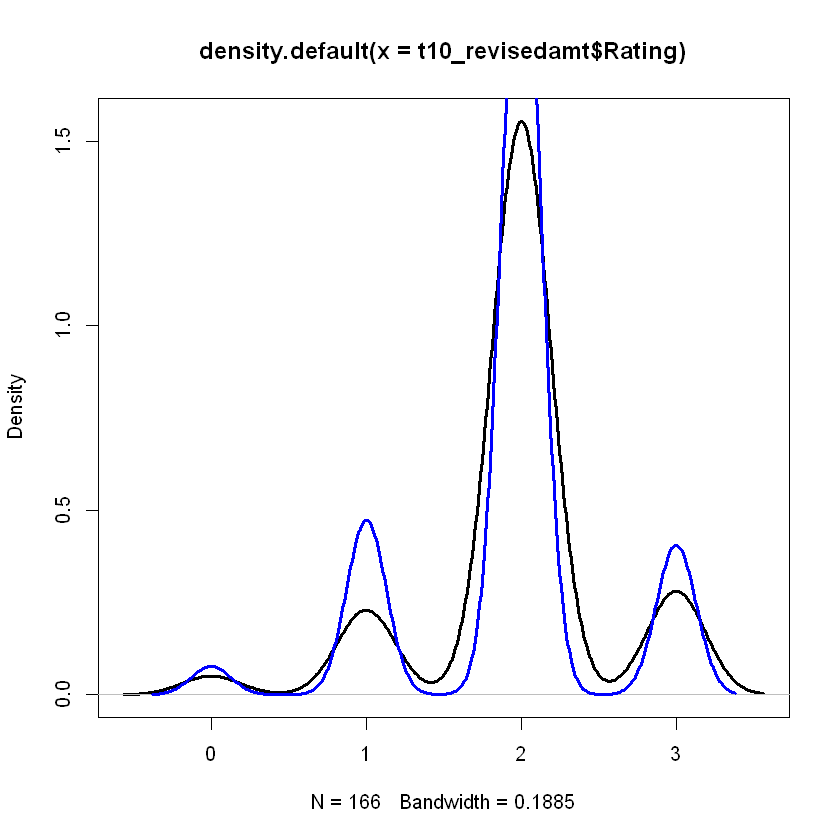

CWRD EARD ERCD  OGC OREI PARD SARD SDCC SERD  SPD 
  24    8    3    1    1   16   25   44   41    3

AWD      CTL     CWRD     EARD   ECRD**     ERCD      IED      OAG 
       2        7      160      220        8       84       12        1 
     OAI      OCO     OCRP      OGC     OREI     PARD     PPFD     PSOD 
       4        4        2       17       53      144       20       25 
    SARD     SDCC     SERD   SERD** SFSP-AUS      SPD       TD 
     243      143      319        6        4       12        5

AFRM     CARM     CWEN     CWER     CWOD     CWPF     CWRC     CWTC 
       3        1        4        3        2        1        3        1 
    CWUW     EAEN     EAER     EAPF     EATC     ERCI     ERDI    GAFSP 
       1        1        2        3        1        1        2        6 
    INRM      IRM     MYRM     NGOC      NRM      OGC     OREI     PAHQ 
       9        2        3        1        1        1        1        2 
    PATE     PAUS     PLCO     PRCM      PRM     SAEN     SAER     SAPF 
       6        3        2        1        6        1        3        2 
    SARC     SATC     SAUW  SDCC-AR     SDCD     SDES     SDGG     SDOD 
       1        2        5        5        2        5        2        1 
    SDSC SDSC-ENE SDSC-TRA SDSC-URB     SEEN     SEER     SEHS     SEOD 
      15        1        4        2        6        8        3        1 
    SEPF     SERC     SETC     SEUW     SLRM     SPBP     SPOD     SPRA 
       4        4        1        5        1        1        1        1 
    SPSO     TLRM      TRM      VRM 
       2        1        1        2

SEPF     CWPF     EAER     EAPF     SAPF     SAEN     EAEN     SEER 
      78       47       43       40       40       37       36       35 
    EASS     SEEN     PAHQ     EATC     PAUS     SDGG     SAUW     OREI 
      33       33       31       30       29       28       27       26 
    CWEN     SATC     ERDI     PATE     PLCO     INRM     PRCM     SETC 
      25       25       24       24       24       23       23       23 
    ERMR     SEHS      IRM     SPSO      TRM      VRM     ERCI    GAFSP 
      22       22       21       21       20       20       19       19 
     BRM      OGC     OREF     SDCD SDSC-TRA     CARM      NRM     SAER 
      18       17       17       17       17       16       16       16 
    SDSC     SDES     CWTC     SARC     SDOD     CWUW     PHCO      PRM 
      16       15       14       13       13       12       12       12 
    SERC     PFOD     SAHS     SLRM     EROD     OROD     SEUW     AFRM 
      12       11       11       11       10       10       10        9 
    CWRC     EREA     IEOD    PSIF2     CWOD     MNRM  SDCC-KS     EAOD 
       9        9        9        9        8        8        8        7 
     LRM     SPBP     PSCM     SAOD     PNRM  SDCC-AR     SOTL     TDCS 
       7        7        6        6        5        5        5        5 
     URM     CTLA     CWER      OCO    PSIF1   SEAE**     TJRM     COCS 
       5        4        4        4        4        4        4        3 
    CTAC     ECOC     KYRM      OAI     PFP1     SEID     SEOC     AWWU 
       3        3        3        3        3        3        3        2 
    AZRM     COPP     CWSS     ECTC    EMSAM      GRM     IESP     MYRM 
       2        2        2        2        2        2        2        2 
    OCRP     PSTS   SAGF**  (Other) 
       2        2        2       32

AFG CAM IND INO KIR LAO MLD MON MYA NEP PAK PHI PNG PRC REG SOL TIM TON UZB VIE 
  5   2  17   4   1   2   1   3   5   3   9   5   1   3  96   1   1   1   1   5

AFG ARM AZE BAN BHU BRU CAM COO FIJ FSM GEO IND INO KAZ KGZ KIR LAO MAL MLD MON 
 22   8   8  49  19   1  33   5   9   6   6  84  51   9  16   3  36   2   8  40 
MYA NAU NEP PAK PAL PHI PNG PRC REG RMI SAM SOL SRI TAJ THA TIM TKM TON TUV UZB 
 17   4  42  35   3  57  20 180 550   4   7  10  23  15  22  14   1   6   3  12 
VAN VIE 
  9  46

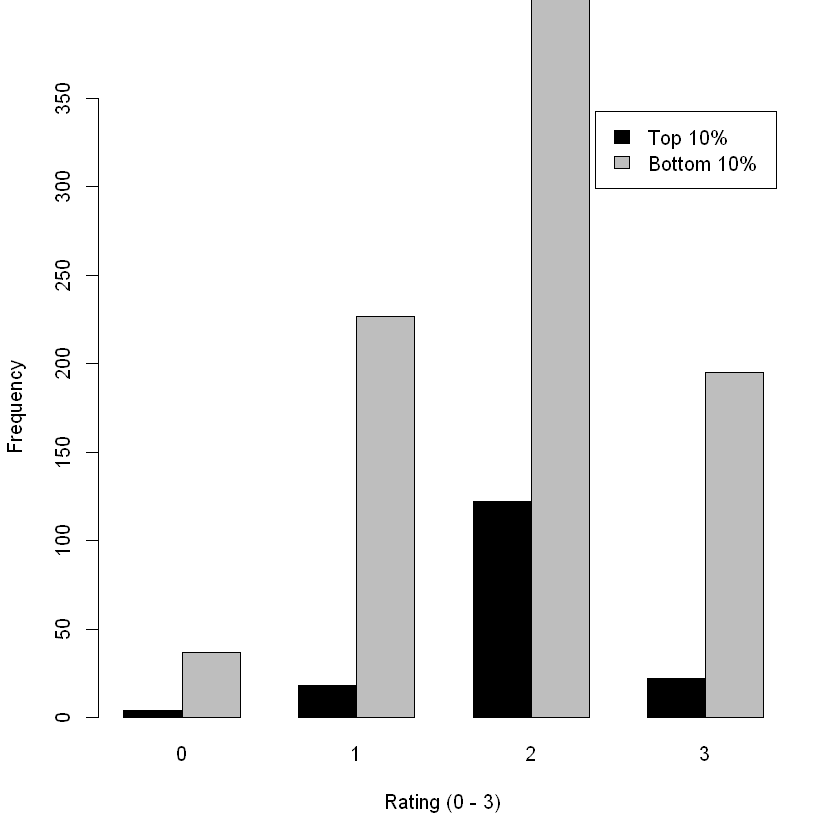

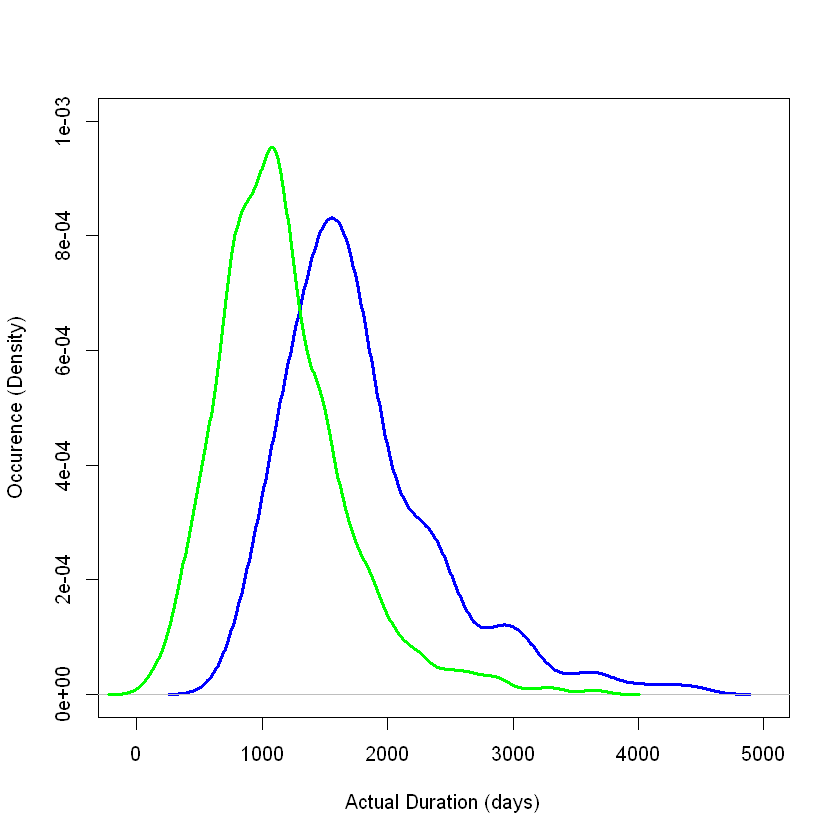

In [109]:
revised.amt <- rev(order(revised_foo$RevisedAmount))
revised2_foo <- revised_foo[revised.amt, ]
totalproj <- nrow(revised2_foo)

t10_revisedamt <- revised2_foo[0:round(0.1 * totalproj), ]
b10_revisedamt <- revised2_foo[(round(0.1 * totalproj) + 1):totalproj, ]
length(t10_revisedamt$RevisedAmount)
length(b10_revisedamt$RevisedAmount)

(mean(t10_revisedamt$Rating) - mean(b10_revisedamt$Rating))/mean(b10_revisedamt$Rating)

mean(t10_revisedamt$RevisedAmount) / mean(b10_revisedamt$RevisedAmount)

quantile(t10_revisedamt$Rating)
quantile(b10_revisedamt$Rating)

median.difference <- median(t10_revisedamt$Rating) - median(b10_revisedamt$Rating)
median.difference

plot(density(t10_revisedamt$Rating), col = "black", lwd = 3)
lines(density(b10_revisedamt$Rating), col = "blue", lwd = 3)

median.diff

t10_revisedamt
b10_revisedamt

ratings <- table(c(replicate(length(t10_revisedamt$Rating), 0), replicate(length(b10_revisedamt$Rating), 1)),
                 c(t10_revisedamt$Rating, b10_revisedamt$Rating))

barplot(ratings, xlab = "Rating (0 - 3)", col = c("black","grey"), ylab = "Frequency",
        ylim = c(0, 350),
        legend = c("Top 10%", "Bottom 10%"), beside = TRUE)

summary(factor(t10_revisedamt$Dept))

summary(factor(b10_revisedamt$Dept))

summary(factor(t10_revisedamt$Division))

summary(factor(b10_revisedamt$Division))

summary(factor(t10_revisedamt$Country))

summary(factor(b10_revisedamt$Country))

t10.dur <- as.Date(as.character(t10_revisedamt$RevisedCompletionDate)) -
  as.Date(as.character(t10_revisedamt$ApprovalDate))

b10.dur <- as.Date(as.character(b10_revisedamt$RevisedCompletionDate)) -
  as.Date(as.character(b10_revisedamt$ApprovalDate))

plot(density(as.numeric(t10.dur)), col = "blue", lwd = 3, xlim = c(-100, 5000), ylim = c(0, 0.001),
     xlab = "Actual Duration (days)", ylab = "Occurence (Density)", main = "")

lines(density(abs(as.numeric(b10.dur))), col = "green", lwd = 3)

Answer: If the distribution of the ratings is taken into consideration, there is no noticeable effect of level of funding on the rating value. The average rating of the top ten percent of funded projects (1.99) is 1.76% larger than the average rating of the bottom ten percent of funded projects (1.95) and the average funding amount is about six times. If it was assumed that there is an effect of ratings on level of funding, causality cannot be established because the funding amounts are correlated with a myriad of other variables depending on country, department and other characteristics of the project. Hence, this indicates we cannot keep the control variables constant to draw a causal relationship between level of funding and rating values. The graph below shows discrepancy in one such control variable (actual project duration vs density of occurence)

In [75]:
summary(revised_foo[which(revised_foo$Rating == 0), ]$RevisedAmount)
summary(revised_foo[which(revised_foo$Rating == 3), ]$RevisedAmount)
colnames(revised_foo)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.009   0.500   0.900   0.977   1.375   3.400 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1250  0.3312  0.7375  1.2057  1.1300 17.2220 

[1] "Number"                  "Status"                 
 [3] "Cluster"                 "Prefix"                 
 [5] "Type"                    "Country"                
 [7] "Dept"                    "Division"               
 [9] "LTAA"                    "Loan"                   
[11] "ApprovalDate"            "AgreementDate"          
[13] "Agreement"               "EffectivityDate"        
[15] "CancellationDate"        "FinancialCompletionDate"
[17] "OriginalCompletionDate"  "RevisedCompletionDate"  
[19] "JSF"                     "Fund"                   
[21] "RevisedAmount"           "Rating"                 
[23] "No"                      "PCR"                    
[25] "CirculationDate"

(5) Imagine your manager asks you to apply Jeremy Howard’s drivetrain model to the problem
of optimal budget-setting to minimize project completion delays (i.e., the difference between
revised and original completion dates). In such a situation, what would be the:
(a) Decision problem or objective?
(b) Lever or levers?
(c) Ideal RCT design?
(d) Dependent variable(s) and independent variable(s) in the modeler?
(e) Why would running RCTs and modeling/optimizing over RCT results be preferable to
using (observational, non-RCT) “foo” data?
Approximate suggested length: 1-3 sentences for each sub-question.


a) The main objective would be to minimize project completion delays (the difference between revised and original completion dates should be minimized).
b) In order to minimize the difference between revised and original completion dates, some of the levers or variables we can tweak are level of funding and project duration. If the budget expenditure for each project is increased optimally, project managers will be able to use the extra capital to get high-quality equipment and a productive labor force, making the project more time-efficient - so the project can be completed closer to the intended original completion date. If project duration predictions become better, allocation of funds will happen optimally. By having a well-defined, optimal budget that allows for upscale of labour and machinery, project duration estimates will be more accurate (feedback loop) and hence differences between revised and original completion dates will become diminished. 
c) Provided that a high level of funding is available, we could start many of the same type of projects at the same time (e.g. building roadways), but the levers of revised amount of funding and and predicted project duration would be derived from a joint uniform random distribution function for each of the roadway projects with a defined range for funding ($100k-$100m) and duration (2-12 years), to see how if we randomly assign funding and duration, what effect that would have on the difference between revised and original completion date. And then with this data, we can come up with an optimal estimate on how much expenditure and time-cost should be attributed to roadway projects. 
d) In this particular model, the dependent variable would be the difference between revised and original completion date - and the independent variables (levers we can control) would be the revised amount of funding and predicted project duration.
e) This is because the given dataset (foo) consists of many variables that are potentially correlated with each other and we cannot compute the magnitude of this correlation and determine the extent of the causation. For example, high revised funding and longer duration seem to be positively related with project rating - but we don't know the extent to which each of these variables affects the rating. We can establish this relationship more clearly using RCTs treatment is randomly assigned and the effects of variables can be isolated. 